# Plot end of century stratospheric temperature

In [1]:
# Import functions
import warnings 
warnings.filterwarnings('ignore')
import os
import iris
import iris.cube
import cf_units
import numpy as np
import numpy.ma as ma
import xarray as xr
import regionmask
from scipy import stats
import iris.plot as iplt
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.cm as mpl_cm
import matplotlib.colors as colors
from matplotlib.gridspec import GridSpec

ERROR 1: PROJ: proj_create_from_database: Open of /home/h05/awells/.conda/envs/env/share/proj failed


## Load and process temp data

In [2]:
# file path
path = '/data/users/awells/geoMIP/processed_data/UKESM1_Annual_temp_pressure_full_'

ssp245 = xr.open_dataarray(path + 'ssp245_2020-2100.nc')
ssp585 = xr.open_dataarray(path + 'ssp585_2020-2100.nc')
g6con = xr.open_dataarray(path + 'G6controller_2020-2100.nc')
g6sulf = xr.open_dataarray(path + 'G6sulfur_2020-2100.nc')

Calculate end of century average and ensemble mean/zonal mean

In [3]:
ssp245_zonal = ssp245.sel(time=slice('2081','2101')).mean(dim=('time', 'longitude', 'realization'))
ssp585_zonal = ssp585.sel(time=slice('2081','2101')).mean(dim=('time', 'longitude', 'realization'))
g6sulf_zonal = g6sulf.sel(time=slice('2081','2101')).mean(dim=('time', 'longitude', 'realization'))
g6con_zonal = g6con.sel(time=slice('2081','2101')).mean(dim=('time', 'longitude', 'realization'))

In [4]:
tropical_ssp245 = ssp245_zonal.sel(latitude=slice(-20,20)).mean('latitude')
tropical_ssp585 = ssp585_zonal.sel(latitude=slice(-20,20)).mean('latitude')
tropical_g6sulf = g6sulf_zonal.sel(latitude=slice(-20,20)).mean('latitude')
tropical_g6con = g6con_zonal.sel(latitude=slice(-20,20)).mean('latitude')

## Calculate statistical significance

In [5]:
ssp245_r = ssp245.sel(time=slice('2081','2101')).sel(realization=0)
for i in range(1, len(ssp245.realization)):
    ssp245_r = xr.concat((ssp245_r, ssp245.sel(time=slice('2081','2101')).sel(realization=i)), dim='time')

ssp585_r = ssp585.sel(time=slice('2081','2101')).sel(realization=0)
for i in range(1, len(ssp585.realization)):
    ssp585_r = xr.concat((ssp585_r, ssp585.sel(time=slice('2081','2101')).sel(realization=i)), dim='time')
    
g6sulf_r = g6sulf.sel(time=slice('2081','2101')).sel(realization=0)
for i in range(1, len(g6sulf.realization)):
    g6sulf_r = xr.concat((g6sulf_r, g6sulf.sel(time=slice('2081','2101')).sel(realization=i)), dim='time')
    
g6con_r = g6con.sel(time=slice('2081','2101')).sel(realization=0)
for i in range(1, len(g6con.realization)):
    g6con_r = xr.concat((g6con_r, g6con.sel(time=slice('2081','2101')).sel(realization=i)), dim='time')

In [6]:
stat, pval = stats.ttest_ind(ssp585_r.mean('longitude'), ssp245_r.mean('longitude'))
pval_ssp585 = xr.DataArray(data=pval, 
                     dims=['pressure', 'latitude'], 
                     coords=dict(latitude=(['latitude'], ssp245_r.latitude.values),
                                 pressure=(['pressure'], ssp245_r.pressure.values)))

stat, pval = stats.ttest_ind(g6sulf_r.mean('longitude'), ssp245_r.mean('longitude'))
pval_g6sulf = xr.DataArray(data=pval, 
                     dims=['pressure', 'latitude'], 
                     coords=dict(latitude=(['latitude'], ssp245_r.latitude.values),
                                 pressure=(['pressure'], ssp245_r.pressure.values)))

stat, pval = stats.ttest_ind(g6con_r.mean('longitude'), ssp245_r.mean('longitude'))
pval_g6con = xr.DataArray(data=pval, 
                     dims=['pressure', 'latitude'], 
                     coords=dict(latitude=(['latitude'], ssp245_r.latitude.values),
                                 pressure=(['pressure'], ssp245_r.pressure.values)))

## Load and process water vapour data

In [7]:
# file path
path = '/data/users/awells/geoMIP/processed_data/UKESM1_Annual_water_vapour_full_'

ssp245 = xr.open_dataarray(path + 'ssp245_2020-2100.nc')
ssp585 = xr.open_dataarray(path + 'ssp585_2020-2100.nc')
g6con = xr.open_dataarray(path + 'G6controller_2020-2100.nc')
g6sulf = xr.open_dataarray(path + 'G6sulfur_2020-2100.nc')

Calculare end of century and ensemble mean

In [8]:
ssp245_zonal_wv = ssp245.sel(time=slice('2081','2101')).mean(dim=('time', 'longitude', 'realization'))
ssp585_zonal_wv = ssp585.sel(time=slice('2081','2101')).mean(dim=('time', 'longitude', 'realization'))
g6sulf_zonal_wv = g6sulf.sel(time=slice('2081','2101')).mean(dim=('time', 'longitude', 'realization'))
g6con_zonal_wv = g6con.sel(time=slice('2081','2101')).mean(dim=('time', 'longitude', 'realization'))

Calculate percentage difference

In [9]:
ssp585_diff = ssp585_zonal_wv - ssp245_zonal_wv
g6sulf_diff = g6sulf_zonal_wv - ssp245_zonal_wv
g6con_diff = g6con_zonal_wv - ssp245_zonal_wv

In [10]:
ssp585_perc = (ssp585_diff / ssp585_zonal_wv) * 100
g6sulf_perc = (g6sulf_diff / g6sulf_zonal_wv) * 100
g6con_perc = (g6con_diff / g6con_zonal_wv) * 100

## Calculate statistical significance

In [11]:
ssp245_r_wv = ssp245.sel(time=slice('2081','2101')).sel(realization=0)
for i in range(1, len(ssp245.realization)):
    ssp245_r_wv = xr.concat((ssp245_r, ssp245.sel(time=slice('2081','2101')).sel(realization=i)), dim='time')

ssp585_r_wv = ssp585.sel(time=slice('2081','2101')).sel(realization=0)
for i in range(1, len(ssp585.realization)):
    ssp585_r_wv = xr.concat((ssp585_r, ssp585.sel(time=slice('2081','2101')).sel(realization=i)), dim='time')
    
g6sulf_r_wv = g6sulf.sel(time=slice('2081','2101')).sel(realization=0)
for i in range(1, len(g6sulf.realization)):
    g6sulf_r_wv = xr.concat((g6sulf_r, g6sulf.sel(time=slice('2081','2101')).sel(realization=i)), dim='time')
    
g6con_r_wv = g6con.sel(time=slice('2081','2101')).sel(realization=0)
for i in range(1, len(g6con.realization)):
    g6con_r_wv = xr.concat((g6con_r, g6con.sel(time=slice('2081','2101')).sel(realization=i)), dim='time')

In [12]:
stat, pval = stats.ttest_ind(ssp585_r_wv.mean('longitude'), ssp245_r_wv.mean('longitude'))
pval_ssp585_wv = xr.DataArray(data=pval, 
                     dims=['pressure', 'latitude'], 
                     coords=dict(latitude=(['latitude'], ssp245_r_wv.latitude.values),
                                 pressure=(['pressure'], ssp245_r_wv.pressure.values)))

stat, pval = stats.ttest_ind(g6sulf_r_wv.mean('longitude'), ssp245_r_wv.mean('longitude'))
pval_g6sulf_wv = xr.DataArray(data=pval, 
                     dims=['pressure', 'latitude'], 
                     coords=dict(latitude=(['latitude'], ssp245_r_wv.latitude.values),
                                 pressure=(['pressure'], ssp245_r_wv.pressure.values)))

stat, pval = stats.ttest_ind(g6con_r_wv.mean('longitude'), ssp245_r_wv.mean('longitude'))
pval_g6con_wv = xr.DataArray(data=pval, 
                     dims=['pressure', 'latitude'], 
                     coords=dict(latitude=(['latitude'], ssp245_r_wv.latitude.values),
                                 pressure=(['pressure'], ssp245_r_wv.pressure.values)))

## Load and process tropopause data

In [13]:
# file path
path = '/data/users/awells/geoMIP/processed_data/UKESM1_Annual_tropopause_full_'

ssp245_trop = xr.open_dataarray(path + 'ssp245_2020-2100.nc') / 100  # Pa to hPa
ssp585_trop = xr.open_dataarray(path + 'ssp585_2020-2100.nc') / 100
g6con_trop = xr.open_dataarray(path + 'G6controller_2020-2100.nc') / 100
g6sulf_trop = xr.open_dataarray(path + 'G6sulfur_2020-2100.nc') / 100

Calculate end of century average and ensemble mean/zonal mean

In [14]:
ssp245_trop_zonal = ssp245_trop.sel(time=slice('2081','2101')).mean(dim=('time', 'longitude', 'realization'))
ssp585_trop_zonal = ssp585_trop.sel(time=slice('2081','2101')).mean(dim=('time', 'longitude', 'realization'))
g6sulf_trop_zonal = g6sulf_trop.sel(time=slice('2081','2101')).mean(dim=('time', 'longitude', 'realization'))
g6con_trop_zonal = g6con_trop.sel(time=slice('2081','2101')).mean(dim=('time', 'longitude', 'realization'))

In [15]:
tropical_trop_ssp245 = ssp245_trop_zonal.sel(latitude=slice(-20,20)).mean('latitude')
tropical_trop_ssp585 = ssp585_trop_zonal.sel(latitude=slice(-20,20)).mean('latitude')
tropical_trop_g6sulf = g6sulf_trop_zonal.sel(latitude=slice(-20,20)).mean('latitude')
tropical_trop_g6con = g6con_trop_zonal.sel(latitude=slice(-20,20)).mean('latitude')

In [16]:
print('SSP2-4.5 tropopause height : ', tropical_trop_ssp245.values.round(2), 'hPA')
print('SSP5-8.5 tropopause height : ', tropical_trop_ssp585.values.round(2), 'hPA')
print('G6sulfur tropopause height : ', tropical_trop_g6sulf.values.round(2), 'hPA')
print('G6controller tropopause height : ', tropical_trop_g6con.values.round(2), 'hPA')

SSP2-4.5 tropopause height :  98.92 hPA
SSP5-8.5 tropopause height :  96.9 hPA
G6sulfur tropopause height :  108.52 hPA
G6controller tropopause height :  102.43 hPA


In [17]:
print('G6sulfur tropopause height percent difference : ', (((tropical_trop_g6sulf - tropical_trop_ssp245)/tropical_trop_ssp245)*100).values.round(2), '%')
print('G6controller tropopause height percent difference: ', (((tropical_trop_g6con - tropical_trop_ssp245)/tropical_trop_ssp245)*100).values.round(2), '%')

G6sulfur tropopause height percent difference :  9.7 %
G6controller tropopause height percent difference:  3.55 %


## Plotting

In [22]:
params = {'legend.fontsize': 20,
          'axes.labelsize': 30,
          'axes.titlesize': 40,
          'axes.linewidth': 8,
          'xtick.labelsize': 25,
          'ytick.labelsize': 25,
          'xtick.major.size': 8,
          'ytick.major.size': 8,
          'axes.grid': True}

plt.rcParams.update(params)

def autosize_figure(nrows, ncolumns, scale_factor=1, xscale_factor=1, yscale_factor=1):
    xwidth = (ncolumns+0.67) * 5.0 * scale_factor * xscale_factor
    ylength = (nrows+0.67) * 3.6 * scale_factor * yscale_factor
    return (xwidth, ylength)

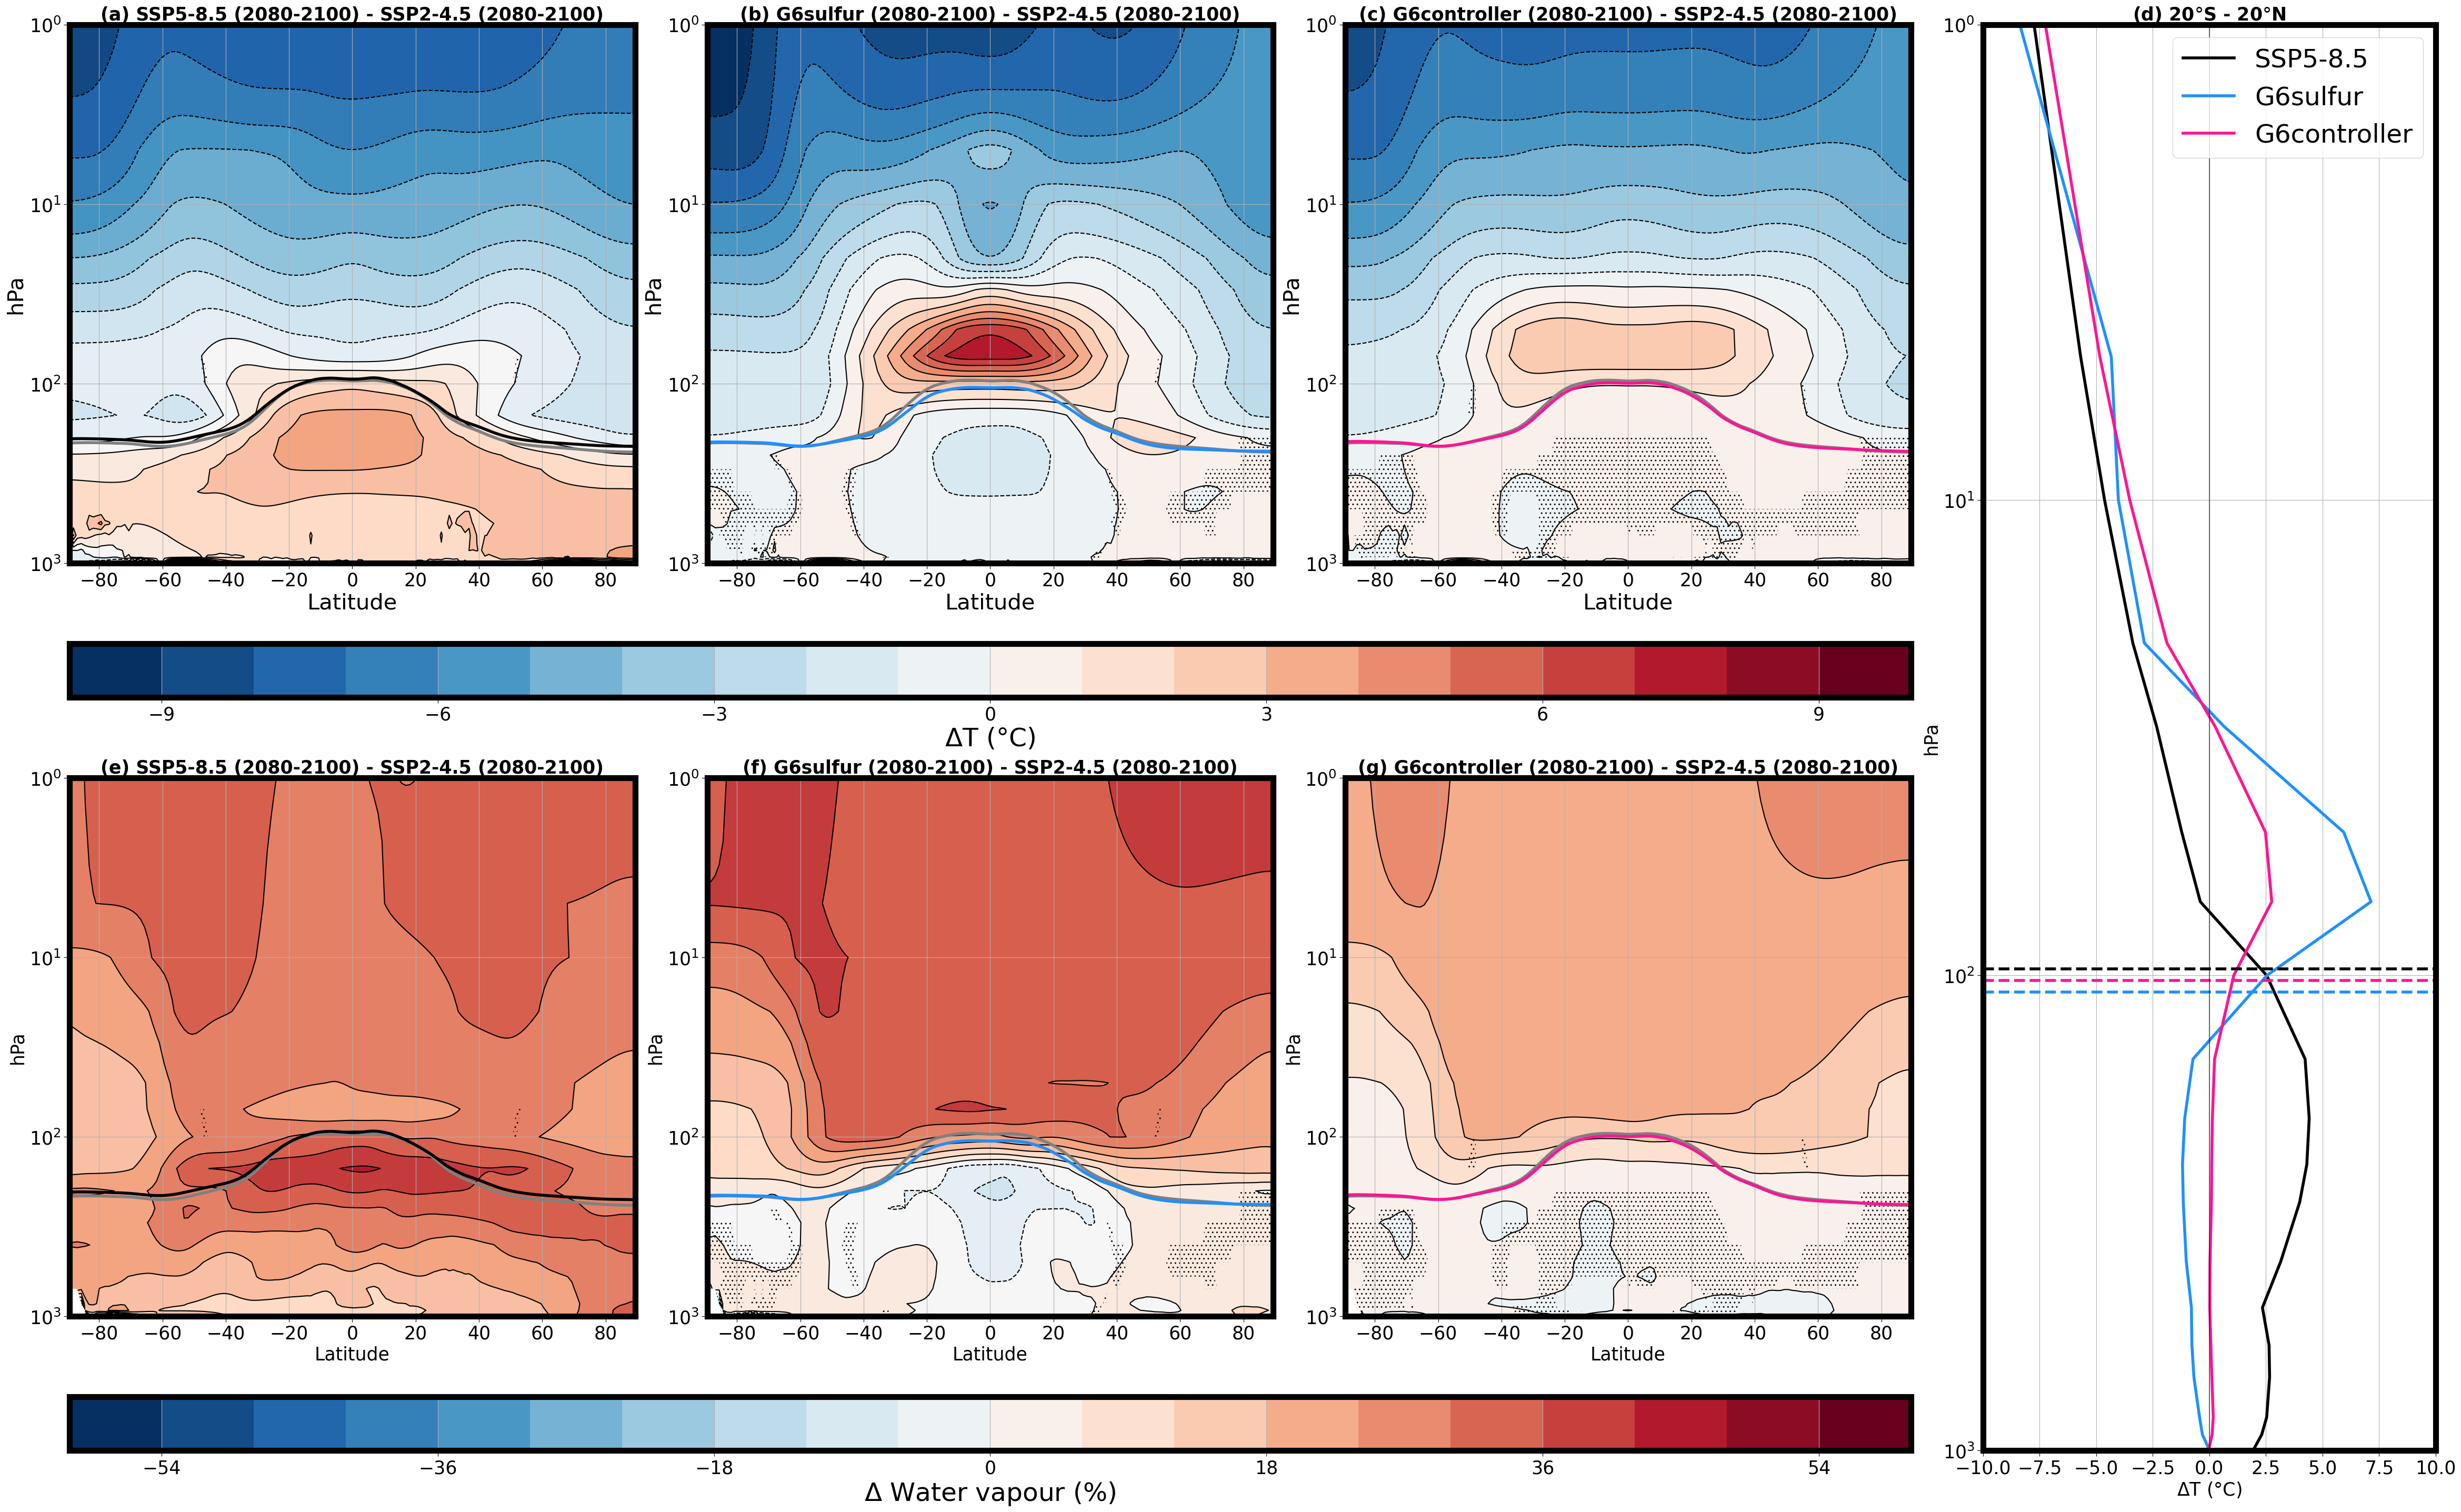

In [23]:
fig = plt.figure(figsize=autosize_figure(2, 4, scale_factor=2, yscale_factor=1.5))
gs = GridSpec(4, 4, height_ratios=[10, 1, 10, 1], width_ratios=[10, 10, 10, 8])

col_map = mpl_cm.get_cmap('RdBu_r')
lvs = np.linspace(-10, 10, 21)
norm = colors.BoundaryNorm(lvs, col_map.N)

ax1 = fig.add_subplot(gs[0, 0])
(ssp585_zonal - ssp245_zonal).plot.contourf(levels=lvs, cmap=col_map, add_colorbar=False)
(ssp585_zonal - ssp245_zonal).plot.contour(levels=lvs, colors='k')
ssp245_trop_zonal.plot(color='grey', linewidth=4)
ssp585_trop_zonal.plot(color='k', linewidth=4)
pval_ssp585.where(pval_ssp585>0.05).plot.contourf(colors='none', levels=[0,1], hatches=['..'], add_colorbar=False)
ax1.invert_yaxis()
ax1.set_yscale('log')
plt.ylabel('hPa', fontsize = 30)
plt.xlabel('Latitude', fontsize = 30)
plt.title('(a) SSP5-8.5 (2080-2100) - SSP2-4.5 (2080-2100)', fontweight='bold', fontsize = 25)

ax2 = fig.add_subplot(gs[0, 1])
(g6sulf_zonal - ssp245_zonal).plot.contourf(levels=lvs, cmap=col_map, add_colorbar=False)
(g6sulf_zonal - ssp245_zonal).plot.contour(levels=lvs, colors='k')
ssp245_trop_zonal.plot(color='grey', linewidth=4)
g6sulf_trop_zonal.plot(color='dodgerblue', linewidth=4)
pval_g6sulf.where(pval_g6sulf>0.05).plot.contourf(colors='none', levels=[0,1], hatches=['..'], add_colorbar=False)
ax2.invert_yaxis()
ax2.set_yscale('log')
plt.ylabel('hPa', fontsize = 30)
plt.xlabel('Latitude', fontsize = 30)
plt.title('(b) G6sulfur (2080-2100) - SSP2-4.5 (2080-2100)', fontweight='bold', fontsize = 25)

ax3 = fig.add_subplot(gs[0, 2])
cb = (g6con_zonal - ssp245_zonal).plot.contourf(levels=lvs, cmap=col_map, add_colorbar=False)
(g6con_zonal - ssp245_zonal).plot.contour(levels=lvs, colors='k')
ssp245_trop_zonal.plot(color='grey', linewidth=4)
g6con_trop_zonal.plot(color='deeppink', linewidth=4)
pval_g6con.where(pval_g6con>0.05).plot.contourf(colors='none', levels=[0,1], hatches=['..'], add_colorbar=False)
ax3.invert_yaxis()
ax3.set_yscale('log')
plt.ylabel('hPa', fontsize = 30)
plt.xlabel('Latitude', fontsize = 30)
plt.title('(c) G6controller (2080-2100) - SSP2-4.5 (2080-2100)', fontweight='bold', fontsize = 25)

ax4 = fig.add_subplot(gs[1, :-1])
col_bar = plt.colorbar(cb, cax=ax4, orientation='horizontal')
col_bar.set_label('$\Delta$T ($\degree$C)', fontsize = 35)

ax5 = fig.add_subplot(gs[:, -1])
plt.plot((tropical_ssp585 - tropical_ssp245), (tropical_ssp585 - tropical_ssp245)['pressure'], color='k', linewidth=4, label='SSP5-8.5')
plt.plot((tropical_g6sulf - tropical_ssp245), (tropical_g6sulf - tropical_ssp245)['pressure'], color='dodgerblue', linewidth=4, label='G6sulfur')
plt.plot((tropical_g6con - tropical_ssp245), (tropical_g6con - tropical_ssp245)['pressure'], color='deeppink', linewidth=4, label='G6controller')
plt.axhline(tropical_trop_ssp585, color='k', linestyle='--', linewidth=4)
plt.axhline(tropical_trop_g6sulf, color='dodgerblue', linestyle='--', linewidth=4)
plt.axhline(tropical_trop_g6con, color='deeppink', linestyle='--', linewidth=4)
plt.axvline(0, alpha=0.5, color='k')
plt.xlim(-10, 10)
plt.ylim(1e0, 1e3)
ax5.grid(True)
ax5.invert_yaxis()
ax5.set_yscale('log')
plt.ylabel('hPa', fontsize = 25)
plt.xlabel('$\Delta$T ($\degree$C)', fontsize = 25)
plt.title('(d) 20$\degree$S - 20$\degree$N', fontweight='bold', fontsize = 25)
plt.legend(fontsize=35)

col_map2 = mpl_cm.get_cmap('RdBu_r')
lvs2 = np.linspace(-60, 60, 21)
norm2 = colors.BoundaryNorm(lvs2, col_map.N)

ax6 = fig.add_subplot(gs[2, 0])
ssp585_perc.plot.contourf(levels=lvs2, cmap=col_map2, add_colorbar=False)
ssp585_perc.plot.contour(levels=lvs2, colors='k')
ssp245_trop_zonal.plot(color='grey', linewidth=4)
ssp585_trop_zonal.plot(color='k', linewidth=4)
pval_ssp585.where(pval_ssp585>0.05).plot.contourf(colors='none', levels=[0,1], hatches=['..'], add_colorbar=False)
ax6.invert_yaxis()
ax6.set_yscale('log')
plt.ylabel('hPa', fontsize = 25)
plt.xlabel('Latitude', fontsize = 25)
plt.title('(e) SSP5-8.5 (2080-2100) - SSP2-4.5 (2080-2100)', fontweight='bold', fontsize = 25)

ax7 = fig.add_subplot(gs[2, 1])
g6sulf_perc.plot.contourf(levels=lvs2, cmap=col_map2, add_colorbar=False)
g6sulf_perc.plot.contour(levels=lvs2, colors='k')
ssp245_trop_zonal.plot(color='grey', linewidth=4)
g6sulf_trop_zonal.plot(color='dodgerblue', linewidth=4)
pval_g6sulf.where(pval_g6sulf>0.05).plot.contourf(colors='none', levels=[0,1], hatches=['..'], add_colorbar=False)
ax7.invert_yaxis()
ax7.set_yscale('log')
plt.ylabel('hPa', fontsize = 25)
plt.xlabel('Latitude', fontsize = 25)
plt.title('(f) G6sulfur (2080-2100) - SSP2-4.5 (2080-2100)', fontweight='bold', fontsize = 25)

ax8 = fig.add_subplot(gs[2, 2])
cb2 = g6con_perc.plot.contourf(levels=lvs2, cmap=col_map2, add_colorbar=False)
g6con_perc.plot.contour(levels=lvs2, colors='k')
ssp245_trop_zonal.plot(color='grey', linewidth=4)
g6con_trop_zonal.plot(color='deeppink', linewidth=4)
pval_g6con.where(pval_g6con>0.05).plot.contourf(colors='none', levels=[0,1], hatches=['..'], add_colorbar=False)
ax8.invert_yaxis()
ax8.set_yscale('log')
plt.ylabel('hPa', fontsize = 25)
plt.xlabel('Latitude', fontsize = 25)
plt.title('(g) G6controller (2080-2100) - SSP2-4.5 (2080-2100)', fontweight='bold', fontsize = 25)

ax9 = fig.add_subplot(gs[3, :-1])
col_bar = plt.colorbar(cb2, cax=ax9, orientation='horizontal')
col_bar.set_label('$\Delta$ Water vapour (%)', fontsize = 35)

plt.tight_layout()
plt.savefig('/net/home/h05/awells/PycharmProjects/G6_comparison/Plots/Wells2023/Figure9.png', dpi=200)
plt.show()